In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from lib.helper import prepare_data
from config.paths import TRAIN_FILE, OUT_FIG_DIR
from sklearn.decomposition import PCA
import numpy as np
from sklearn import linear_model

In [43]:
import matplotlib
font = {'size': 8}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 0.5

In [44]:
df_train, df_test = prepare_data(TRAIN_FILE)

In [45]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(df_train.drop(columns=['Activity']))
# pcs = pcs[::-1]

In [46]:
colors = np.array(['#8370BC', '#D5A360'])

In [47]:
model = linear_model.LogisticRegression(C=1000000)
_ = model.fit(pcs, df_train.Activity)

/home/wxk/.conda/envs/gcn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
xs = np.linspace(-1, 1, 50)
# intercept + w1 * x + w2 * y = 0
ys = (xs * model.coef_[0, 0] + model.intercept_) / model.coef_[0, 1]

In [49]:
save_path = OUT_FIG_DIR + "/PCA.pdf"

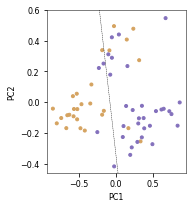

In [50]:
fig, ax = plt.subplots(figsize=(2.5, 3))
plt.scatter(pcs[:, 0], pcs[:, 1], color=colors[df_train.Activity], s=9)

plt.plot(xs, ys, linestyle='--', color='black', linewidth=0.4)
plt.ylim(min(pcs[:, 1])*1.1, max(pcs[:, 1])*1.1)
plt.xlim(min(pcs[:, 0])*1.1, max(pcs[:, 0])*1.1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig(save_path, bbox_inches='tight')